## Disease Prediction Using Classification

In this notebook, we build a classification model to **predict the disease (prognosis)** based on a patient's symptoms, weather conditions, and other features such as age and gender.

### 🔍 Why Classification?

This task is a classic **supervised learning problem**: we have input features and a known output label (`prognosis`). Classification allows us to train a model that can learn from historical cases and make accurate predictions on new patient data.

For example:
- If a patient presents with **headache, vomiting, and high temperature**, the model may predict a high probability of **Migraine**.
- If a patient has **chest pain, high blood pressure, and humidity is high**, it might predict **Heart Attack**.

These predictions could support **clinical decision-making**, early detection, or patient triage.

### 🔗 How Pattern Mining Helps

Earlier, we used pattern mining (FP-Growth) to identify frequent symptom combinations linked to specific diseases. Those patterns help:
- Highlight **strong symptom-disease associations** (e.g., `{headache, vomiting} → Migraine`)
- Guide **feature importance awareness** before modeling
- Validate whether the model is learning similar relationships

### ❌ Why Not Clustering or Outlier Detection?

- **Clustering** is unsupervised and used to explore hidden groupings — but we already know the disease labels.
- **Outlier detection** identifies rare or unusual data points — useful for anomaly detection, not disease prediction.

Therefore, **classification** is the most appropriate and effective approach for our goal.


## Step 1: Load Preprocessed Data

We begin by loading the cleaned and scaled dataset from the preprocessing step. This dataset includes both binary symptom indicators and continuous features (e.g., age, weather) that have been normalized.


In [1]:
import pandas as pd

# Load preprocessed data
df = pd.read_csv("../data/processed/cleaned_data.csv")

# Separate features and target
X = df.drop(columns=["prognosis"])
y = df["prognosis"]

print(f"Dataset shape: {X.shape}")
print(f"Target classes: {y.nunique()} → {y.unique()[:11]}")
# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(X.head())


ModuleNotFoundError: No module named 'pandas'

## Step 2: Split Data into Training and Test Sets

To evaluate our classification model, we split the data into two parts:

- **Training set**: Used to train the model (80% of the data).
- **Test set**: Used to evaluate how well the model performs on unseen data (20%).

We use `train_test_split()` from `scikit-learn` with the following parameters:

- `X`: All the input features (symptoms, age, weather data, etc.).
- `y`: The target labels (i.e., the `prognosis` column — the disease to be predicted).
- `test_size=0.2`: Allocates 20% of the data for testing.
- `stratify=y`: Ensures that each class (disease) is proportionally represented in both train and test sets.
- `random_state=42`: Ensures reproducibility by fixing the random seed.

This gives us:

- `X_train`: Feature values for training.
- `X_test`: Feature values for testing.
- `y_train`: Target labels for training.
- `y_test`: Target labels for testing.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Step 3: Train a K-Nearest Neighbors (KNN) Classifier

We train a KNN model using `k = 5`, which means the prediction is based on the 5 closest neighbors in the training data. KNN is a distance-based method, so it's important that continuous features are properly scaled — which was done during preprocessing.

### Introduction to K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a **non-parametric** and **instance-based** learning algorithm. It works by comparing a new, unseen data point to the labeled data points in the training set. Specifically, it looks for the `k` closest data points (neighbors) in terms of feature similarity — typically using a distance metric like Euclidean distance — and assigns the most common class label among those neighbors to the new point.

This method is effective when similar cases tend to have similar outcomes, making it highly interpretable and intuitive.

In our context, KNN is useful because it can naturally take into account the **similarity of symptoms and environmental conditions** (like temperature or humidity) across patients. For example, if previous patients with high fever, chest pain, and similar weather exposure were diagnosed with dengue, KNN can use those historical patterns to make accurate predictions for new cases. It doesn't assume a fixed model form, which is helpful given the complex, multi-factor nature of medical data.


### 🔍 Visual Explanation of KNN (Illustration Only)

To help visualize how the **K-Nearest Neighbors algorithm** works, the following plot shows a **synthetic 2D dataset** and a new data point being classified based on its 5 nearest neighbors.

> ⚠️ **Note**: This example is **purely illustrative**. It uses **artificial data** for visualization purposes and is not based on the actual medical dataset used in this project.

The plot demonstrates:
- How KNN uses distance to find the `k` nearest points.
- How the predicted class is chosen by **majority vote** among neighbors.
- The visual connection between the new sample and its neighbors.


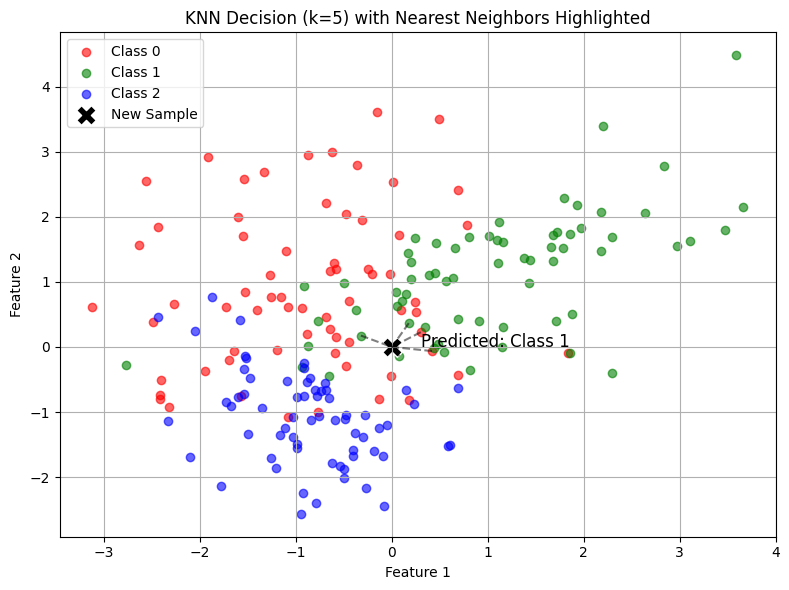

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import numpy as np

# Generate simple 2D data for demonstration
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, n_classes=3, random_state=42
)

colors = ['red', 'green', 'blue']
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Train KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# New sample
new_point = np.array([[0, 0]])
predicted_class = knn.predict(new_point)[0]

# Find k nearest neighbors
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)
distances, indices = nn.kneighbors(new_point)

# Plot the data
plt.figure(figsize=(8, 6))

# Plot existing points
for class_value in np.unique(y):
    plt.scatter(
        X[y == class_value, 0], X[y == class_value, 1],
        color=colors[class_value], label=class_labels[class_value], alpha=0.6
    )

# Highlight nearest neighbors
for idx in indices[0]:
    plt.plot([X[idx, 0], new_point[0, 0]], [X[idx, 1], new_point[0, 1]], 
             'k--', alpha=0.5)

# Plot new point
plt.scatter(new_point[0][0], new_point[0][1], color='black', edgecolor='white', 
            marker='X', s=200, label='New Sample')

# Annotate prediction
plt.text(new_point[0][0] + 0.3, new_point[0][1], 
         f"Predicted: Class {predicted_class}", fontsize=12, color='black')

plt.title(f"KNN Decision (k={k}) with Nearest Neighbors Highlighted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)


## Step 3.1: Evaluate Model Performance

We evaluate the KNN model using standard classification metrics:
- **Accuracy**: Overall correctness
- **Precision / Recall / F1-Score**: Per-class evaluation
- **Confusion Matrix**: Visual breakdown of true vs predicted labels


Accuracy: 0.9679
              precision    recall  f1-score   support

   Arthritis       1.00      0.98      0.99        60
 Common Cold       0.90      0.98      0.94        62
      Dengue       1.00      0.97      0.98        62
      Eczema       1.00      1.00      1.00        62
Heart Attack       0.98      0.98      0.98       194
 Heat Stroke       1.00      0.91      0.95        65
   Influenza       0.92      0.94      0.93       126
     Malaria       1.00      0.98      0.99        64
    Migraine       0.96      0.97      0.96       180
   Sinusitis       1.00      0.97      0.98        60
      Stroke       0.95      0.95      0.95        62

    accuracy                           0.97       997
   macro avg       0.97      0.97      0.97       997
weighted avg       0.97      0.97      0.97       997



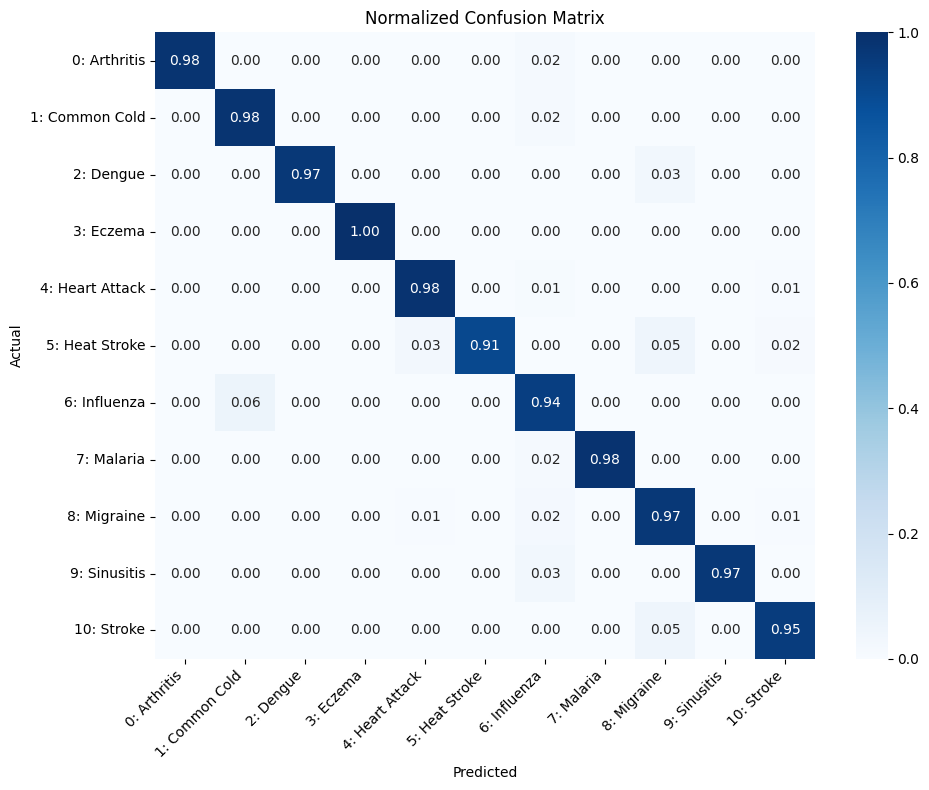

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

def evaluate_model(y_true, y_pred, class_names, save_path):
    """
    Evaluates a classification model by printing metrics and plotting a normalized confusion matrix.

    Parameters:
    - y_true: Ground truth labels
    - y_pred: Predicted labels
    - class_names: List of class names in the order of encoded labels
    - save_path: Path to save the confusion matrix image
    """

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Classification Report
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Format labels: e.g. 0: Arthritis, 1: Common Cold, ...
    labels = [f"{i}: {name}" for i, name in enumerate(class_names)]

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    # Ensure output folder exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", cbar=True,
                xticklabels=labels, yticklabels=labels)
    plt.title("Normalized Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# Get class names from the target variable
# If your dataframe is still called df
class_names = df['prognosis'].unique().tolist()
class_names = sorted(class_names)  # Ensure correct order

# Evaluate the model
save_path = "../report/knn/confusion_matrix.png"
evaluate_model(y_test, y_pred, class_names, save_path)

## Step 3.2: Optimize the Number of Neighbors (k)

K-Nearest Neighbors relies on the `k` parameter — the number of nearest neighbors used to classify a new point.

Choosing the right `k` is crucial:
- **Too small** → very sensitive to noise (overfitting).
- **Too large** → overly smooth predictions (underfitting).

In this step, we evaluate multiple values of `k` and visualize their corresponding accuracy scores. Our goal is to select the value of `k` that maximizes accuracy on the test set.


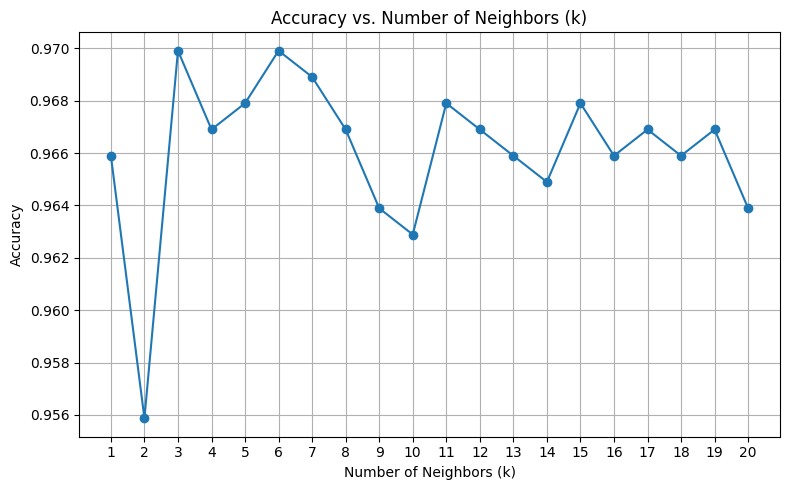

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("../report/knn/accuracy_vs_k.png", dpi=300)
plt.show()


## Step 3.3: Final KNN Model & Interpretation

After tuning the `k` value, we retrain the model using the **best-performing number of neighbors** and finalize our results.

We evaluate this model again to confirm its performance and summarize the key takeaways.


✅ Final KNN model trained with k = 3

Final Classification Report:
              precision    recall  f1-score   support

   Arthritis       1.00      0.98      0.99        60
 Common Cold       0.88      0.98      0.93        62
      Dengue       0.98      0.97      0.98        62
      Eczema       1.00      1.00      1.00        62
Heart Attack       0.99      0.99      0.99       194
 Heat Stroke       0.97      0.94      0.95        65
   Influenza       0.94      0.93      0.94       126
     Malaria       0.98      0.98      0.98        64
    Migraine       0.96      0.98      0.97       180
   Sinusitis       1.00      0.97      0.98        60
      Stroke       0.97      0.94      0.95        62

    accuracy                           0.97       997
   macro avg       0.97      0.97      0.97       997
weighted avg       0.97      0.97      0.97       997

Accuracy: 0.9699
              precision    recall  f1-score   support

   Arthritis       1.00      0.98      0.99     

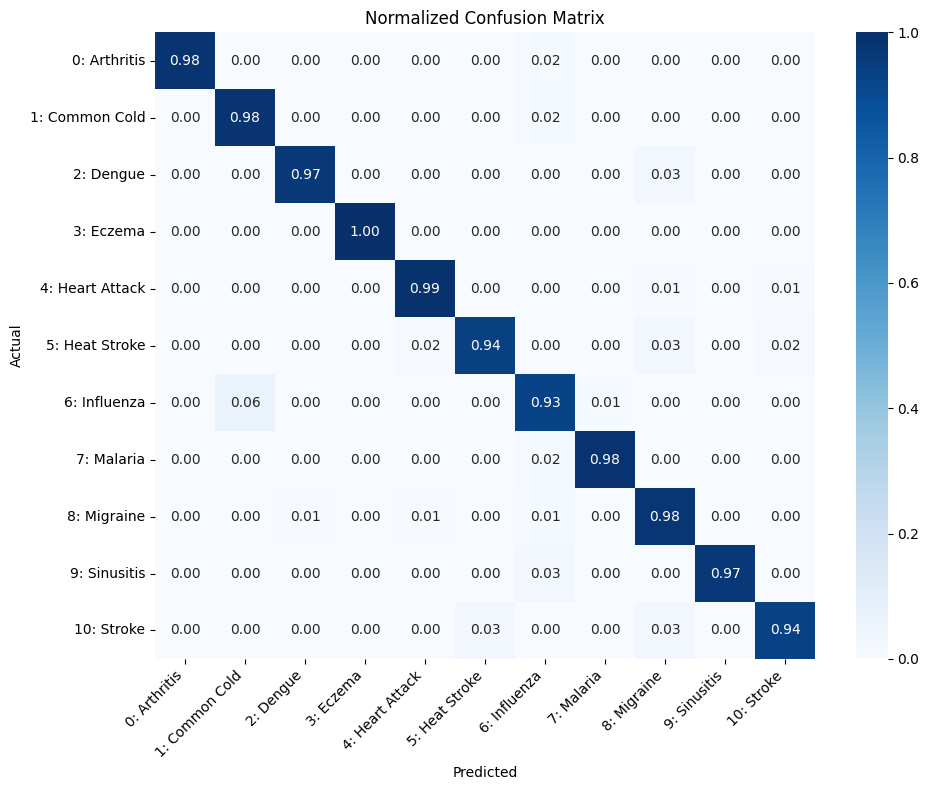

In [ ]:
# Final model with best k (replace with your chosen best_k)
best_k = k_values[accuracies.index(max(accuracies))]
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
final_preds = final_knn.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

print(f"✅ Final KNN model trained with k = {best_k}")
print("\nFinal Classification Report:")
print(classification_report(y_test, final_preds))

# Generate new confusion matrix
evaluate_model(y_test, final_preds, class_names, save_path="../report/knn/final_confusion_matrix.png")



In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report as a dictionary
report = classification_report(y_test, final_preds, target_names=class_names, output_dict=True)

# Convert it to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Round for better readability
df_report = df_report.round(3)

# Display the table
display(df_report)


,precision,recall,f1-score,support
Arthritis,1.000,0.983,0.992,60.00
Common Cold,0.884,0.984,0.931,62.00
Dengue,0.984,0.968,0.976,62.00
Eczema,1.000,1.000,1.000,62.00
Heart Attack,0.990,0.990,0.990,194.00
Heat Stroke,0.968,0.938,0.953,65.00
Influenza,0.944,0.929,0.936,126.00
Malaria,0.984,0.984,0.984,64.00
Migraine,0.962,0.978,0.970,180.00
Sinusitis,1.000,0.967,0.983,60.00


## Step 4: Disease Prediction Using Decision Tree Classifier

In this step, we train a **Decision Tree classifier** to predict patient diagnoses based on their symptoms and environmental conditions.

### What is a Decision Tree?

A **Decision Tree** is a supervised learning model that makes predictions by learning a series of **if-else rules** from the data. The model recursively splits the dataset based on feature values that best separate the classes. The resulting structure is a flowchart-like tree, where:

- **Internal nodes** represent decisions based on feature thresholds (e.g., "Is temperature > 38°C?").
- **Branches** represent possible outcomes of a decision.
- **Leaf nodes** represent the final predicted class (diagnosis).

This model is highly interpretable — clinicians can trace back the reasoning behind each prediction by following the tree path.

### Why Use a Decision Tree Here?

In our context, Decision Trees are a good fit because:

- They can naturally handle both **binary symptoms** and **continuous weather features**.
- They can capture **nonlinear interactions** between symptoms and conditions.
- The tree structure provides an **explainable model**, which is desirable in healthcare applications.
- They allow us to identify which features (symptoms, age, weather) are most important for predicting each disease.

### Workflow

We will:
1. Train a Decision Tree model on our dataset.
2. Evaluate its predictive performance.
3. Visualize the learned tree structure to inspect how the model makes decisions.
4. Compare its performance.

### Limitations of Decision Trees

While Decision Trees offer excellent interpretability, they also come with some limitations:

- **Overfitting**: A fully grown tree may fit the training data perfectly but perform poorly on new data. Pruning or limiting the tree depth (e.g., `max_depth`) is often required to avoid this.
- **Instability**: Small changes in the data can lead to very different tree structures, as the tree-building process is greedy.
- **Bias toward features with more levels**: Features with more unique values may dominate splits, even if they are not truly more informative.
- **Lower predictive power** compared to ensemble methods (such as Random Forest or Gradient Boosted Trees), which combine multiple trees to improve accuracy and robustness.

Despite these limitations, Decision Trees remain a valuable tool for **interpretable baseline models** and for understanding the structure of the data.



## Step 4.1: Train the Decision Tree Classifier

We first initialize and train a **Decision Tree classifier** using the training set.

At this stage, we use default hyperparameters, meaning the tree will grow fully to fit the data. We will later explore how controlling the tree depth can help improve generalization.

Training a Decision Tree involves the model learning **splitting rules** that divide the feature space into regions associated with each disease class.

We then generate predictions on the test set to evaluate the model's performance.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test set
dt_pred = dt_model.predict(X_test)


## Step 4.2: Evaluate the Decision Tree Model

We evaluate the Decision Tree classifier using the following metrics:

- **Accuracy**: Overall proportion of correct predictions.
- **Precision / Recall / F1-Score**: Detailed per-class evaluation of model performance.
- **Confusion Matrix**: Visual breakdown of true vs. predicted labels.

These metrics help us understand how well the model performs across different disease classes and whether it tends to favor certain predictions.


Accuracy: 0.9719
              precision    recall  f1-score   support

   Arthritis       0.98      0.98      0.98        60
 Common Cold       0.90      0.92      0.91        62
      Dengue       0.97      0.97      0.97        62
      Eczema       1.00      1.00      1.00        62
Heart Attack       0.99      0.98      0.99       194
 Heat Stroke       0.97      0.97      0.97        65
   Influenza       0.95      0.98      0.96       126
     Malaria       0.97      0.92      0.94        64
    Migraine       0.98      0.98      0.98       180
   Sinusitis       1.00      1.00      1.00        60
      Stroke       0.95      0.94      0.94        62

    accuracy                           0.97       997
   macro avg       0.97      0.97      0.97       997
weighted avg       0.97      0.97      0.97       997



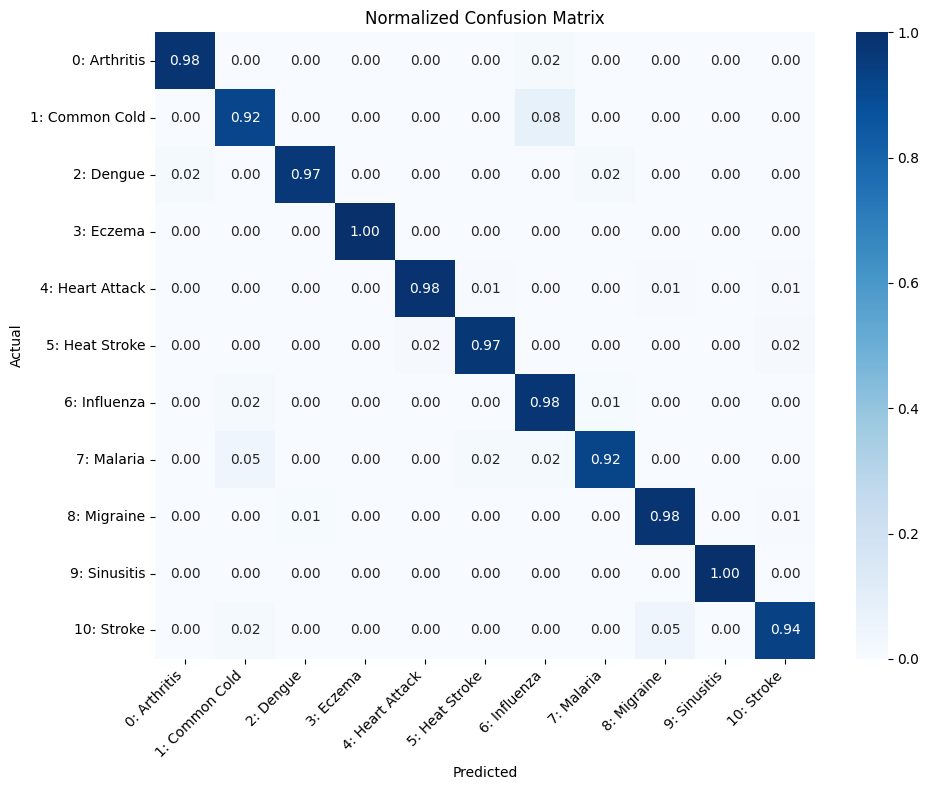

In [ ]:
# Use correct class names from your dataframe
class_names = sorted(df['prognosis'].unique().tolist())

# Evaluate Decision Tree
save_path = "../report/decision_tree/confusion_matrix.png"
evaluate_model(y_test, dt_pred, class_names, save_path)


## Step 4.3: Visualize the Decision Tree

One of the main advantages of Decision Trees is their **interpretability**. The trained model can be visualized as a tree structure where:

- Each **internal node** represents a decision based on a feature.
- Each **branch** corresponds to the outcome of that decision.
- Each **leaf node** represents a predicted disease class.

Visualizing the tree helps us understand **which symptoms and environmental factors** are most important for predicting each disease. It also allows us to inspect the logical structure of the model.


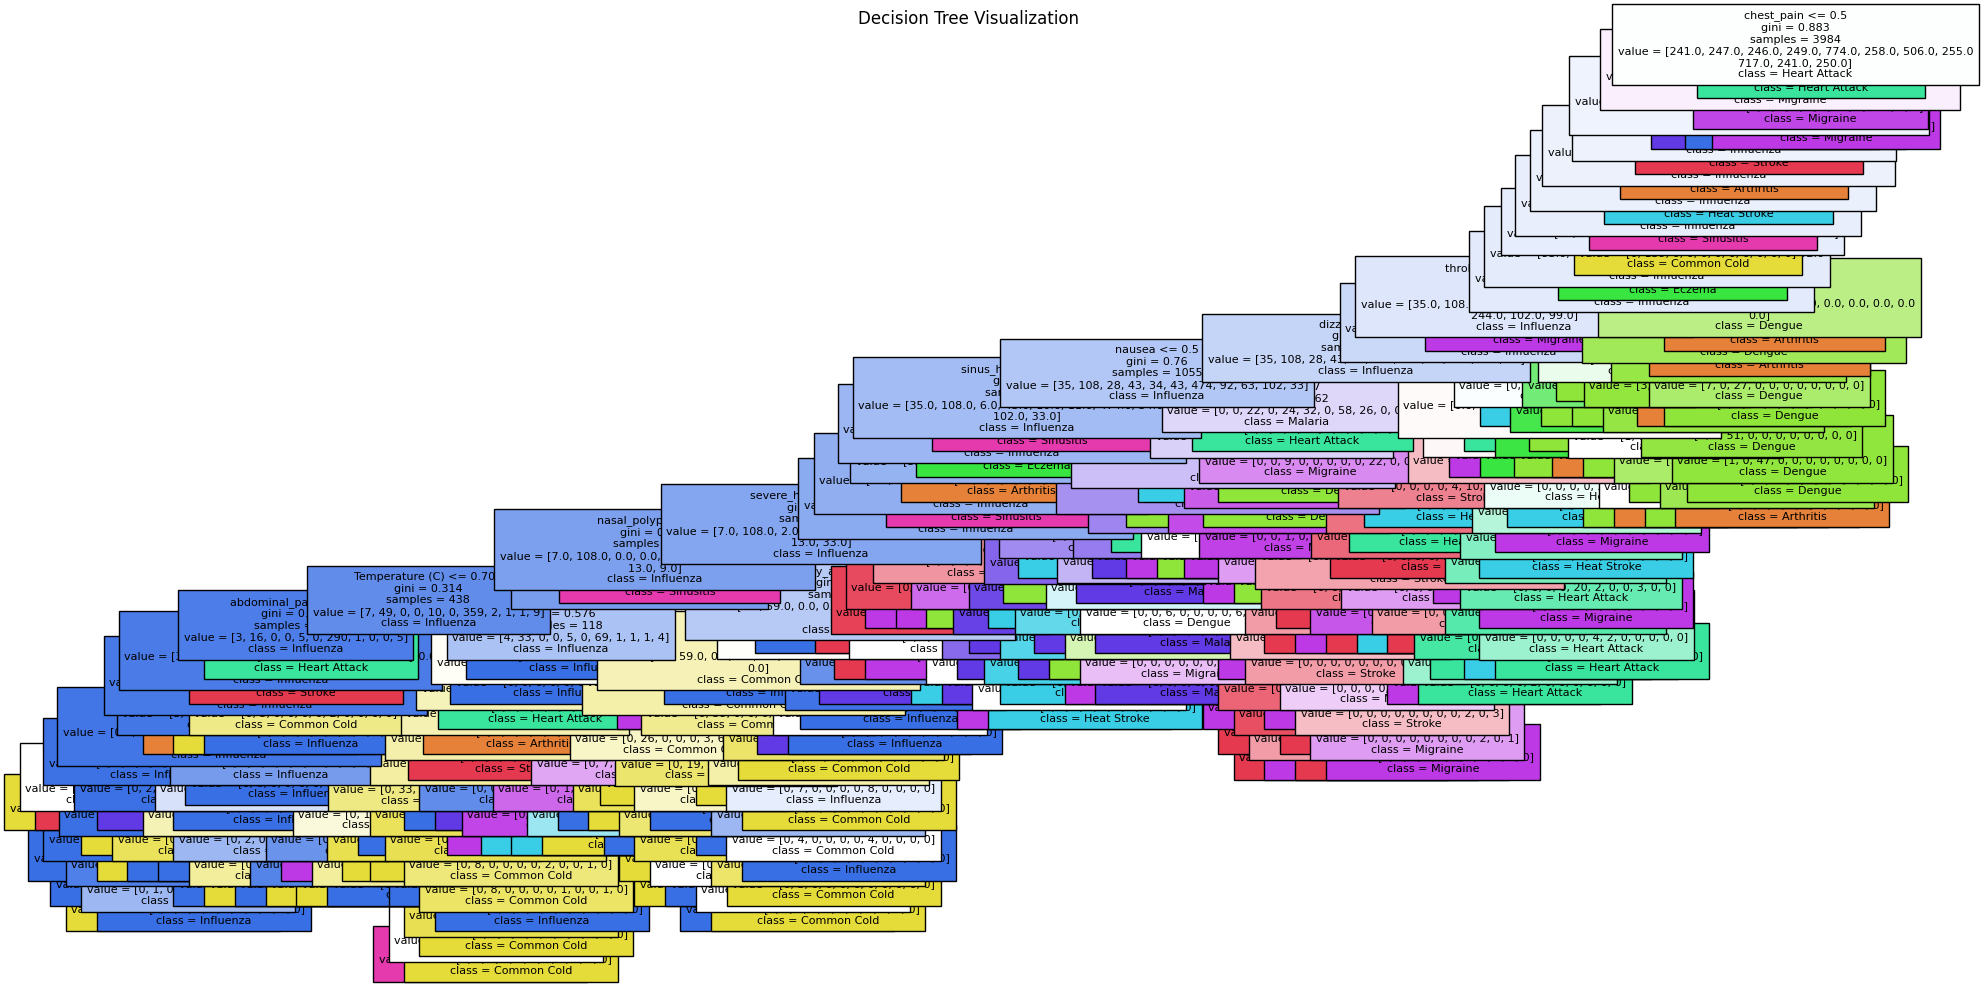

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the full Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=df.drop(columns=["prognosis"]).columns.tolist(),
          class_names=class_names, 
          filled=True, 
          fontsize=8)

plt.title("Decision Tree Visualization")
plt.tight_layout()

# Save to report
plt.savefig("../report/decision_tree/decision_tree_plot.png", dpi=300)
plt.show()


## Step 4.4: Tune the Maximum Depth of the Tree

Fully grown Decision Trees tend to **overfit** the training data, resulting in very large and complex trees that are difficult to interpret.

By limiting the tree's maximum depth (`max_depth` parameter), we can:

- Improve generalization to unseen data.
- Produce a simpler and more readable tree.
- Focus on the most important decision paths.

Here, we retrain the model with `max_depth = [4,8,12,16,20]` to produce a more interpretable structure.


Accuracy: 0.4885
              precision    recall  f1-score   support

   Arthritis       0.00      0.00      0.00        60
 Common Cold       0.00      0.00      0.00        62
      Dengue       0.00      0.00      0.00        62
      Eczema       0.00      0.00      0.00        62
Heart Attack       1.00      0.83      0.91       194
 Heat Stroke       0.00      0.00      0.00        65
   Influenza       0.20      1.00      0.33       126
     Malaria       1.00      0.59      0.75        64
    Migraine       1.00      0.68      0.81       180
   Sinusitis       0.00      0.00      0.00        60
      Stroke       1.00      0.63      0.77        62

    accuracy                           0.49       997
   macro avg       0.38      0.34      0.32       997
weighted avg       0.53      0.49      0.46       997



c:\Users\Marsel\Desktop\Uni\Echange\Data Science\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Marsel\Desktop\Uni\Echange\Data Science\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Marsel\Desktop\Uni\Echange\Data Science\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

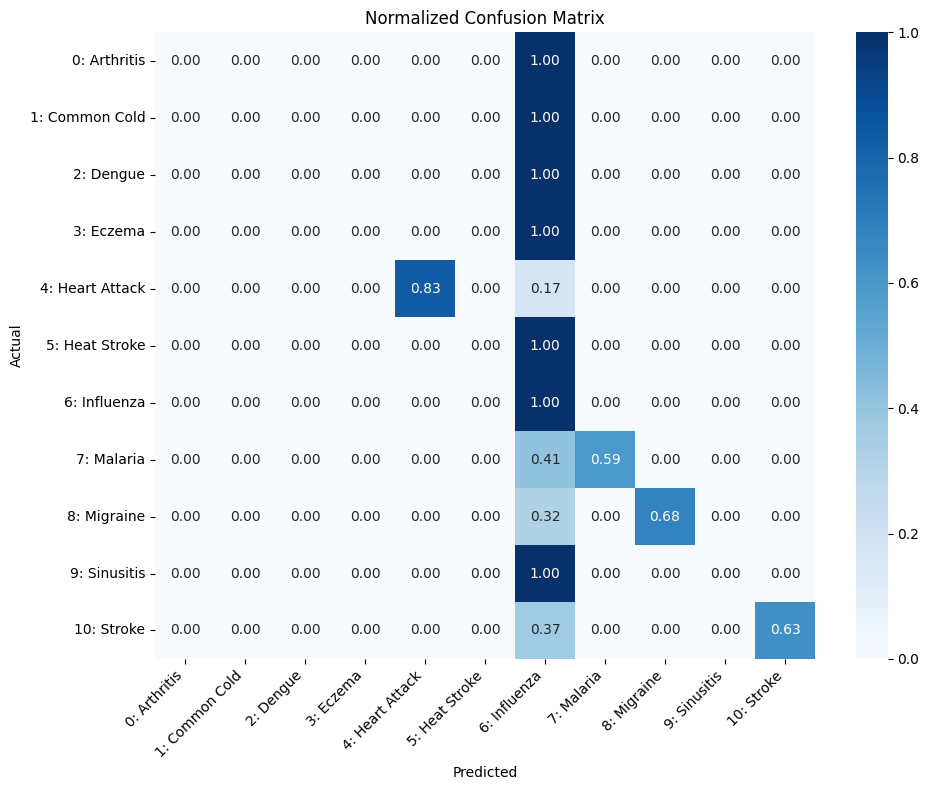

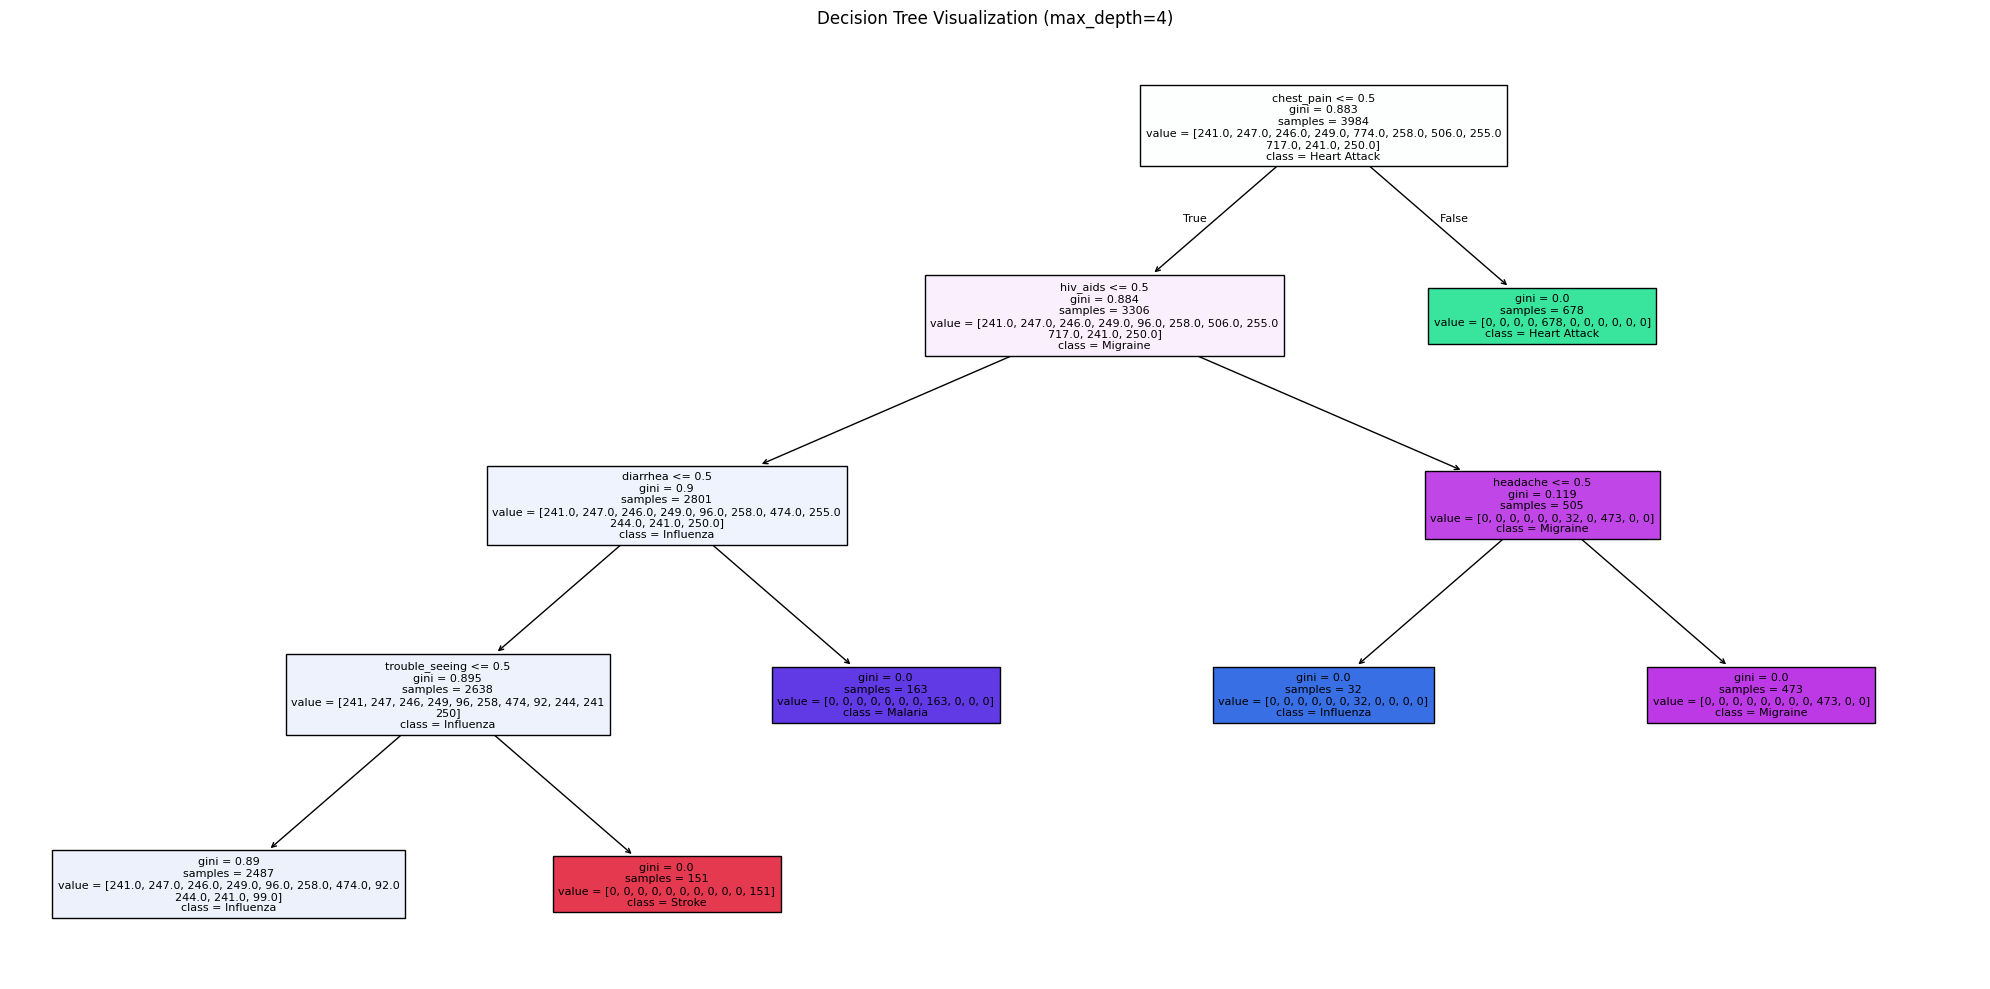

Accuracy: 0.6389
              precision    recall  f1-score   support

   Arthritis       1.00      0.72      0.83        60
 Common Cold       1.00      0.63      0.77        62
      Dengue       0.00      0.00      0.00        62
      Eczema       0.00      0.00      0.00        62
Heart Attack       1.00      0.83      0.91       194
 Heat Stroke       1.00      0.51      0.67        65
   Influenza       0.26      1.00      0.41       126
     Malaria       1.00      0.59      0.75        64
    Migraine       1.00      0.68      0.81       180
   Sinusitis       1.00      0.58      0.74        60
      Stroke       1.00      0.63      0.77        62

    accuracy                           0.64       997
   macro avg       0.75      0.56      0.61       997
weighted avg       0.78      0.64      0.66       997



c:\Users\Marsel\Desktop\Uni\Echange\Data Science\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Marsel\Desktop\Uni\Echange\Data Science\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Marsel\Desktop\Uni\Echange\Data Science\Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

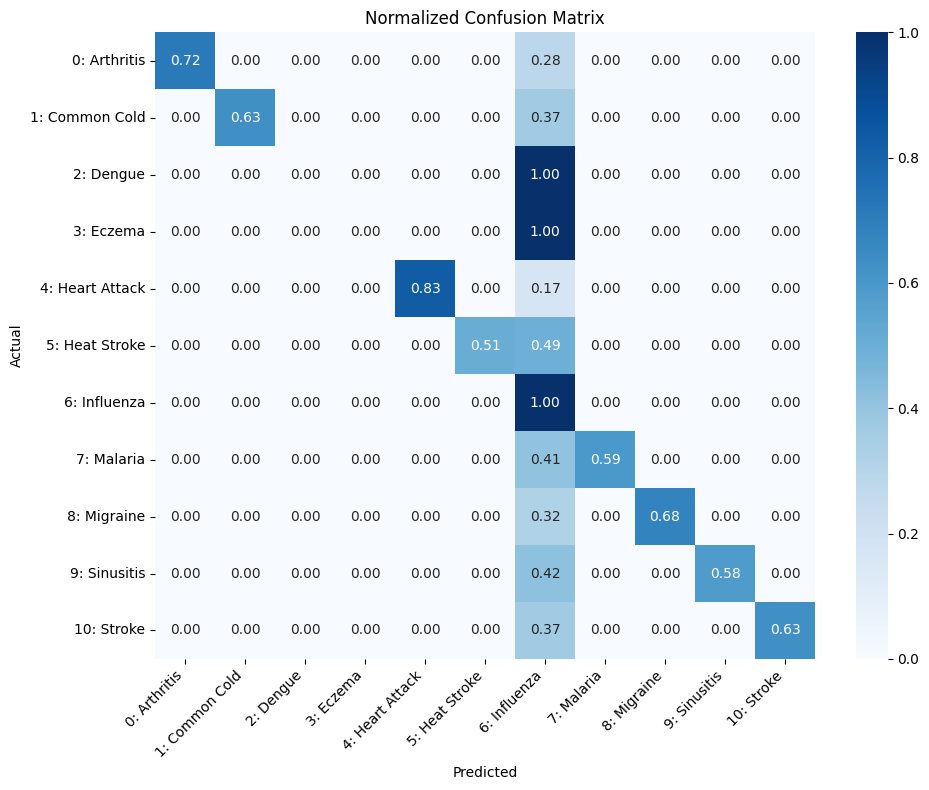

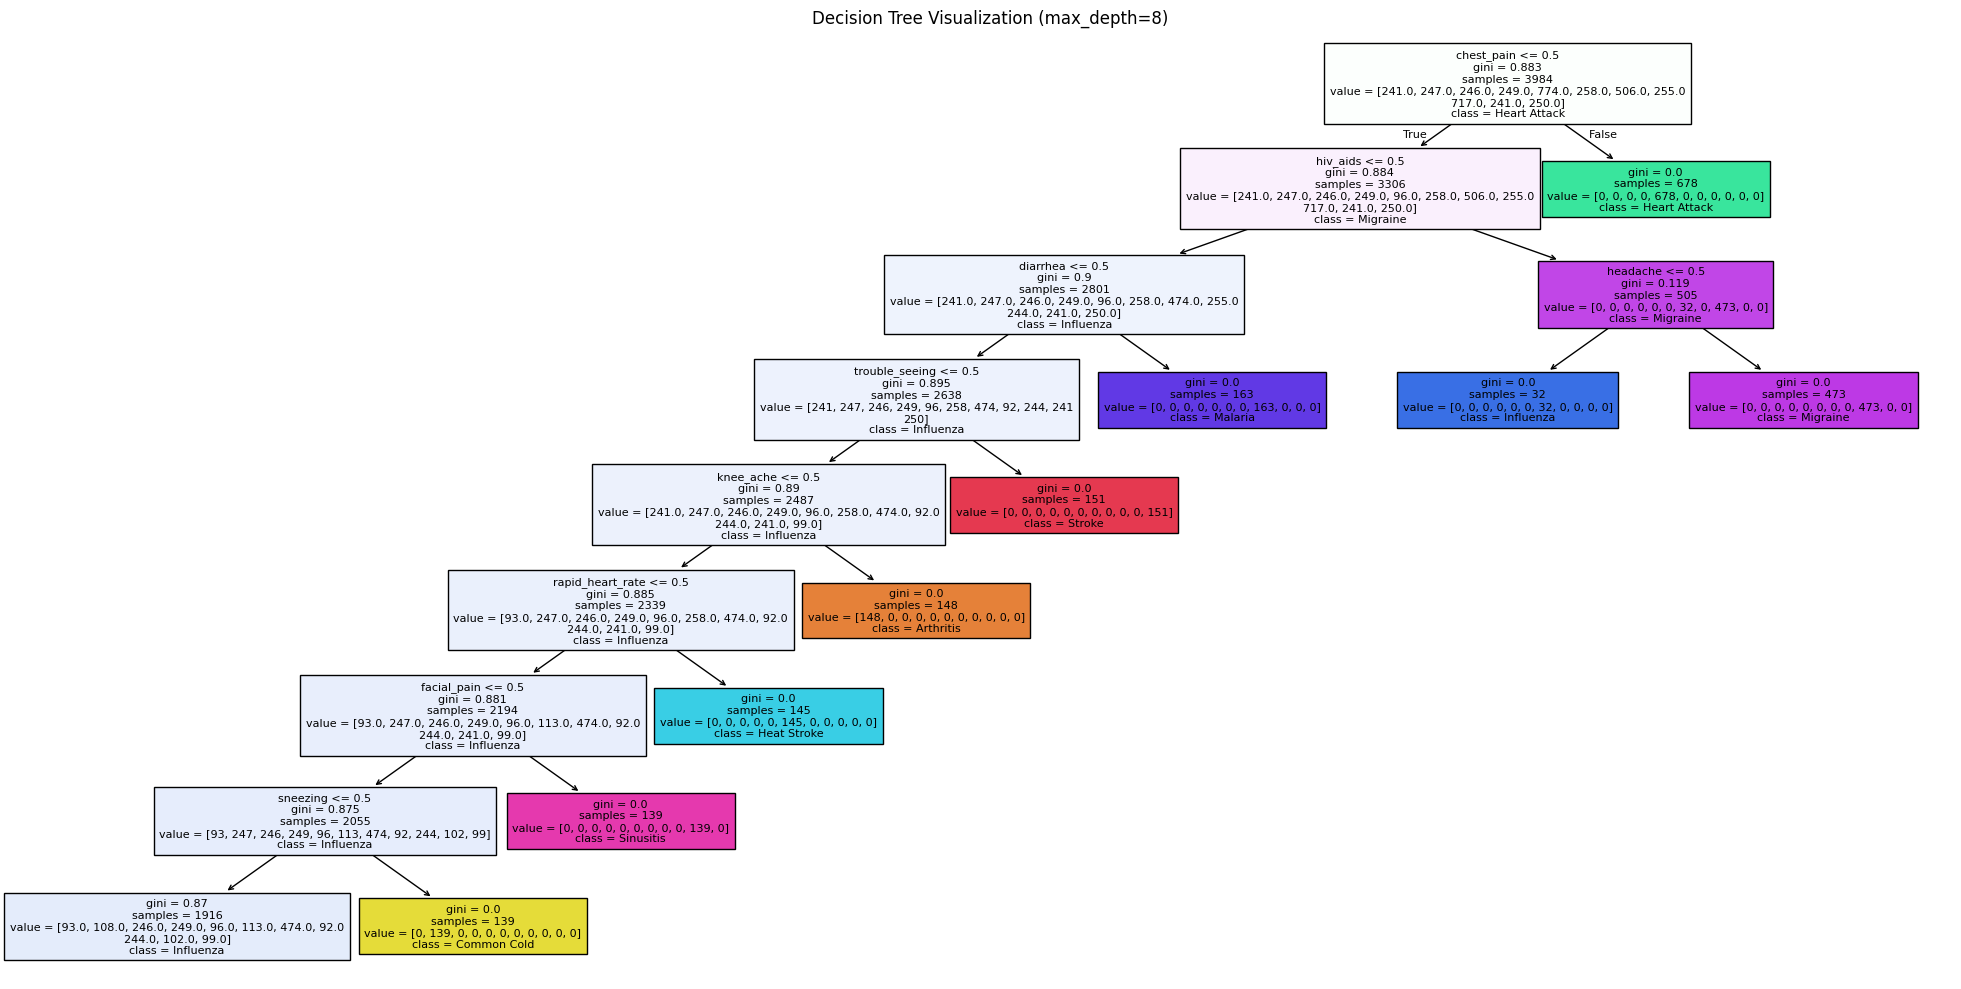

Accuracy: 0.7553
              precision    recall  f1-score   support

   Arthritis       1.00      0.85      0.92        60
 Common Cold       1.00      0.63      0.77        62
      Dengue       0.95      0.56      0.71        62
      Eczema       0.77      0.79      0.78        62
Heart Attack       1.00      0.83      0.91       194
 Heat Stroke       1.00      0.51      0.67        65
   Influenza       0.36      1.00      0.53       126
     Malaria       1.00      0.59      0.75        64
    Migraine       1.00      0.82      0.90       180
   Sinusitis       1.00      0.58      0.74        60
      Stroke       1.00      0.63      0.77        62

    accuracy                           0.76       997
   macro avg       0.92      0.71      0.77       997
weighted avg       0.90      0.76      0.79       997



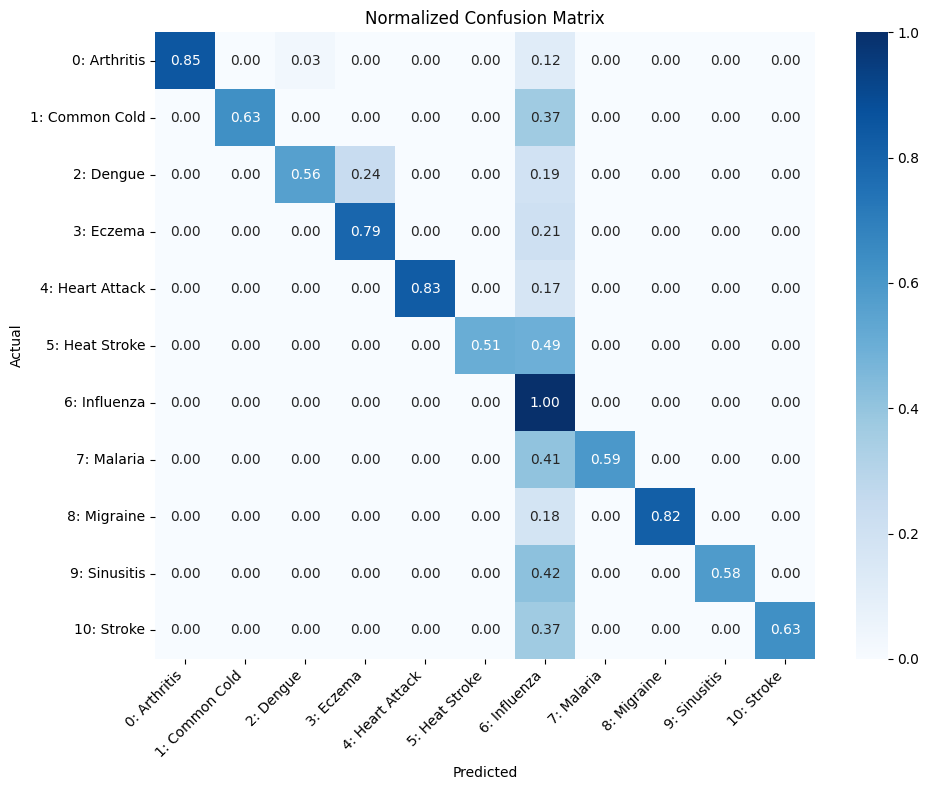

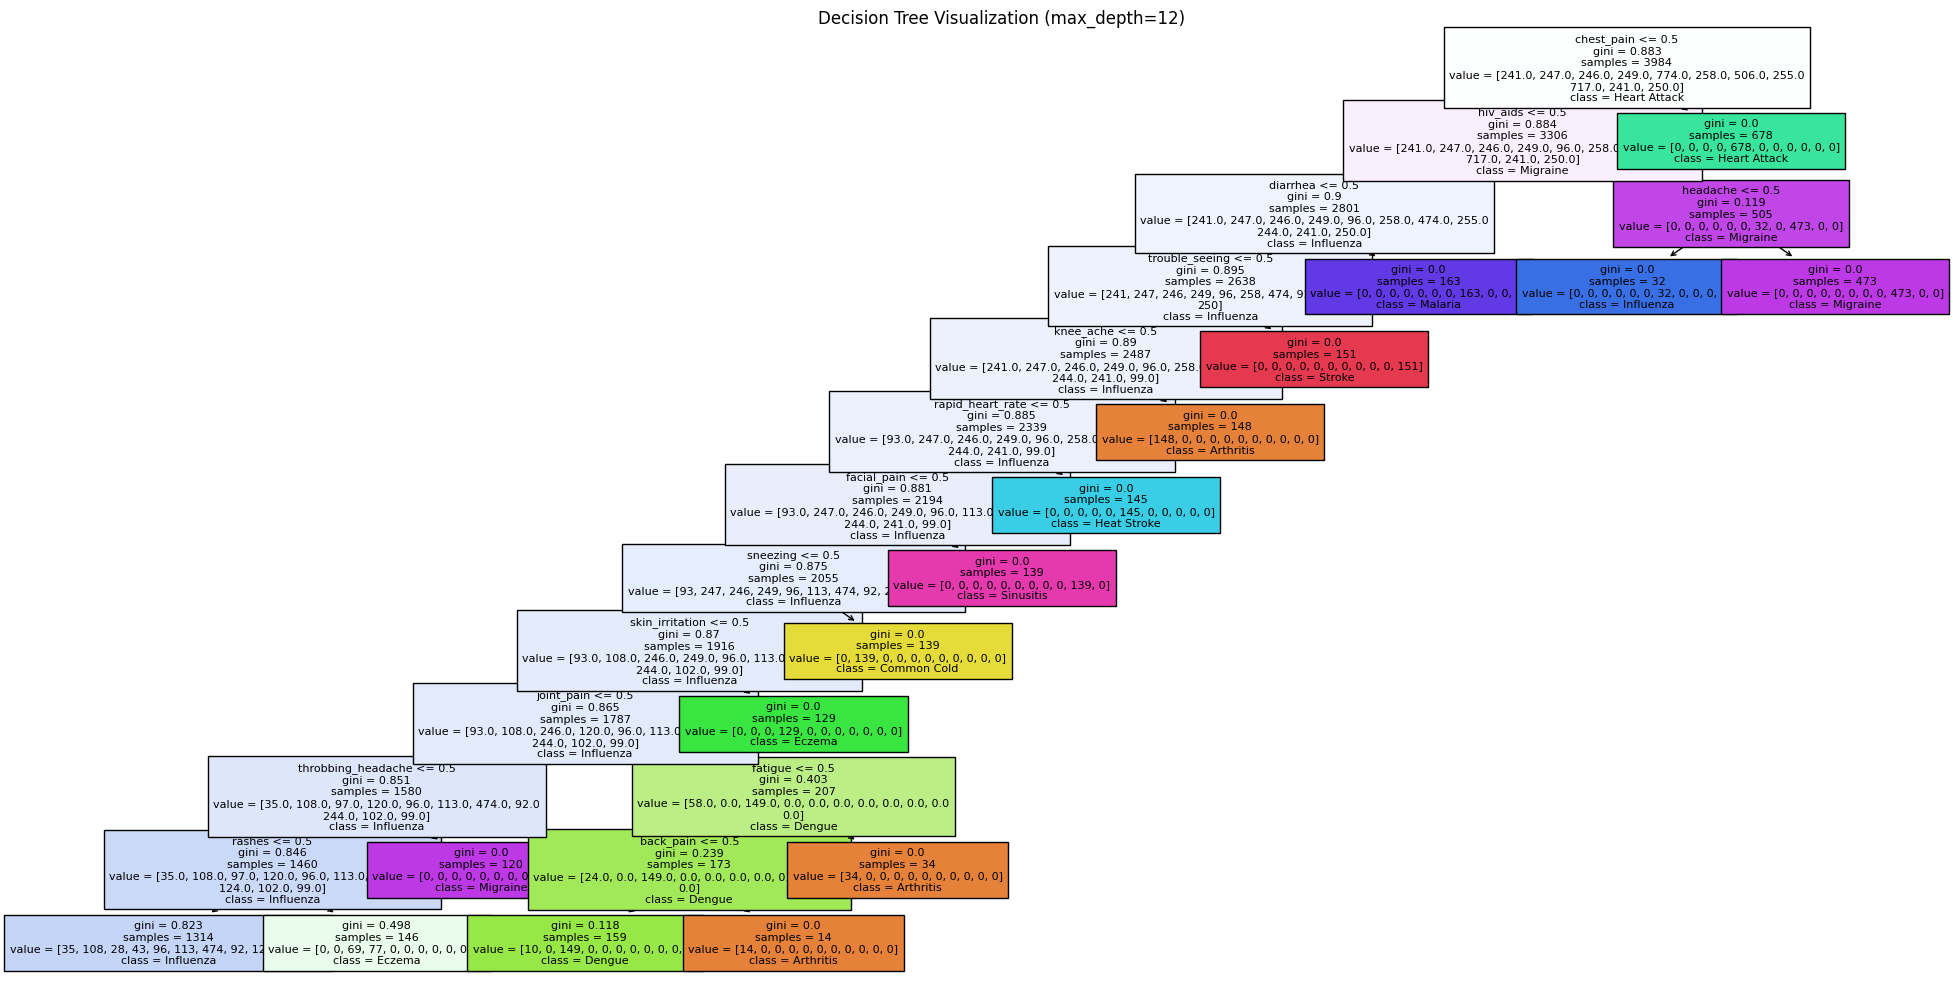

Accuracy: 0.8716
              precision    recall  f1-score   support

   Arthritis       1.00      0.88      0.94        60
 Common Cold       1.00      0.63      0.77        62
      Dengue       1.00      0.81      0.89        62
      Eczema       1.00      1.00      1.00        62
Heart Attack       1.00      0.92      0.96       194
 Heat Stroke       1.00      0.62      0.76        65
   Influenza       0.60      1.00      0.75       126
     Malaria       0.85      0.86      0.85        64
    Migraine       0.95      0.90      0.93       180
   Sinusitis       1.00      0.80      0.89        60
      Stroke       0.67      0.89      0.76        62

    accuracy                           0.87       997
   macro avg       0.92      0.85      0.86       997
weighted avg       0.91      0.87      0.88       997



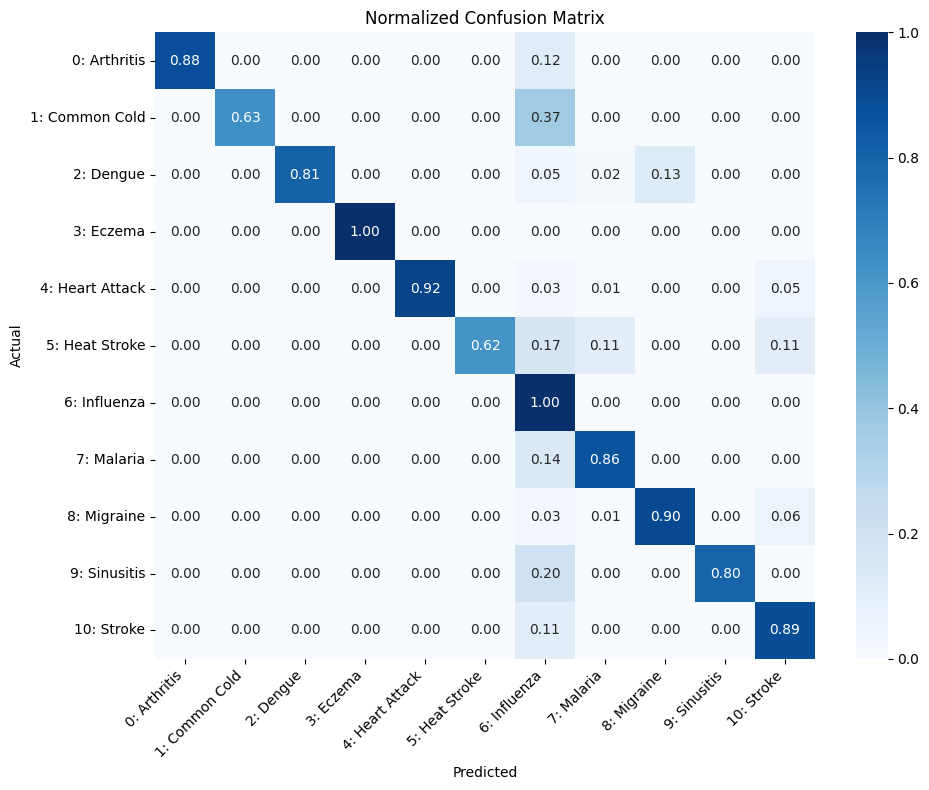

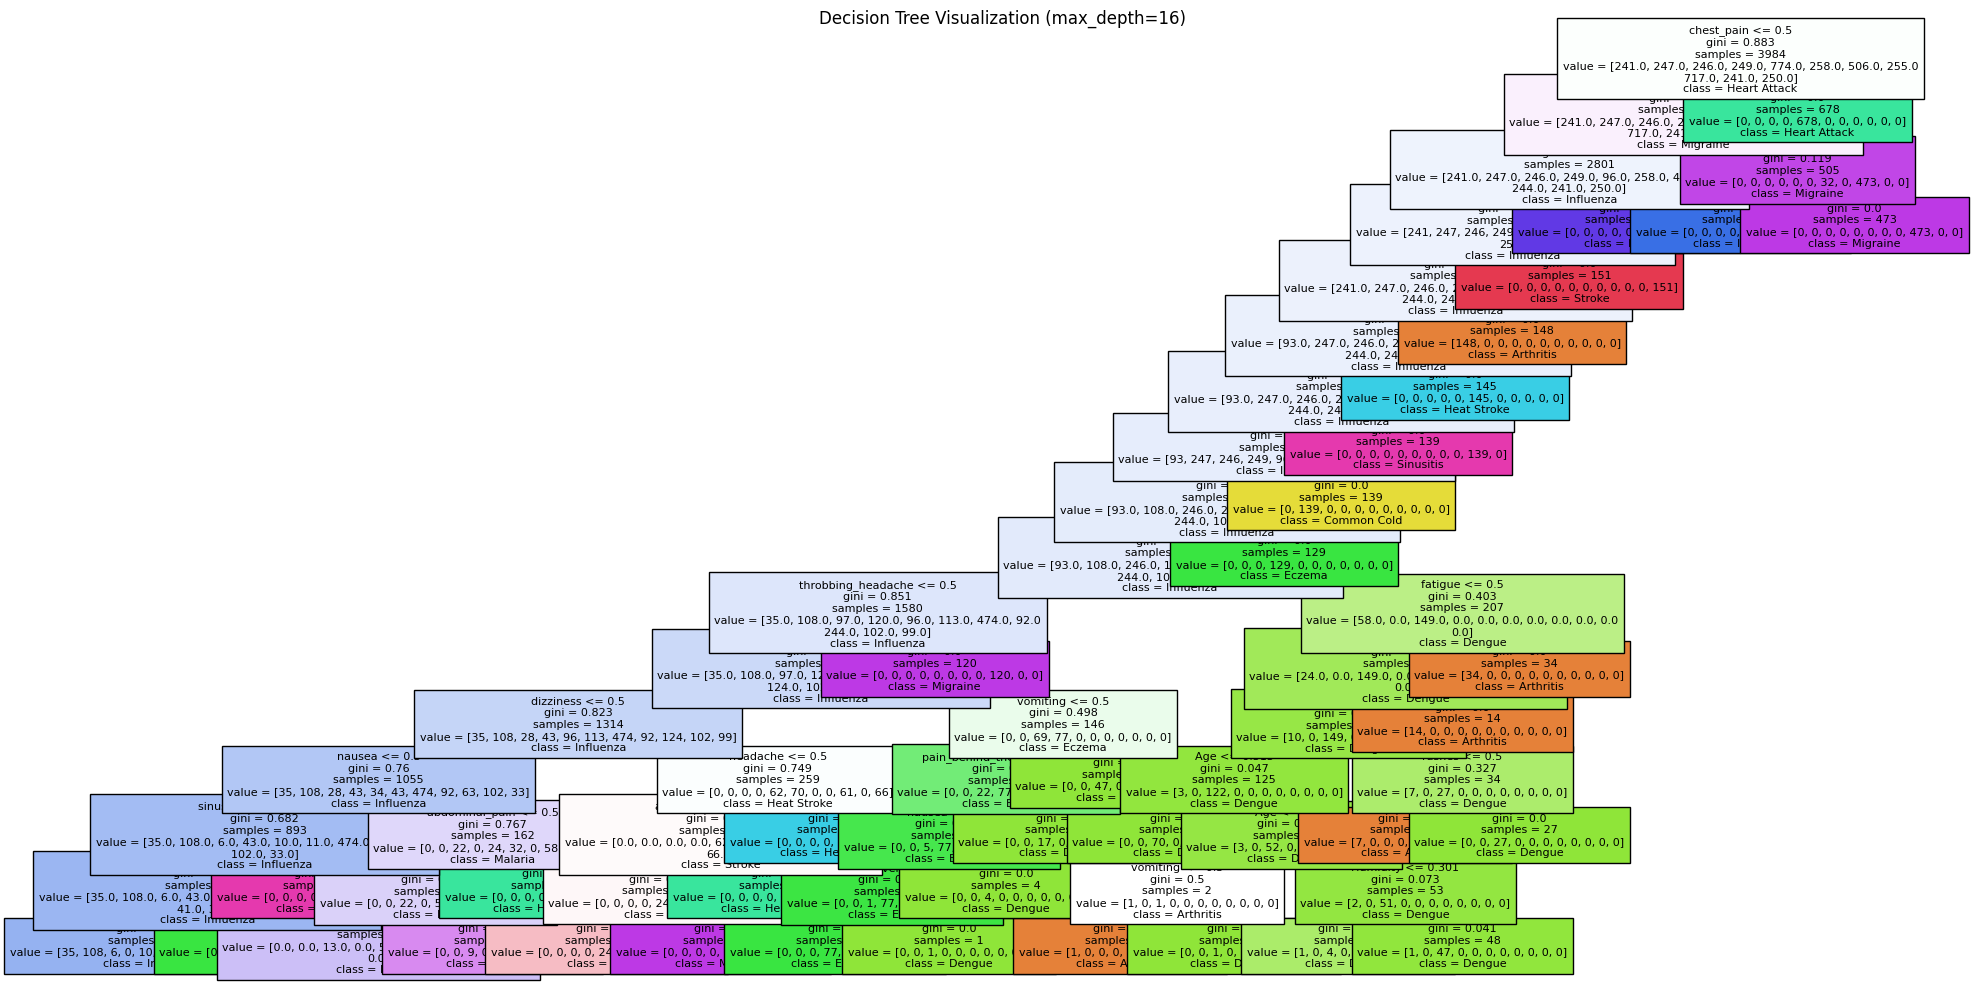

Accuracy: 0.9308
              precision    recall  f1-score   support

   Arthritis       0.98      0.95      0.97        60
 Common Cold       1.00      0.63      0.77        62
      Dengue       0.95      0.94      0.94        62
      Eczema       1.00      1.00      1.00        62
Heart Attack       0.99      0.96      0.98       194
 Heat Stroke       1.00      0.86      0.93        65
   Influenza       0.72      1.00      0.84       126
     Malaria       0.87      0.94      0.90        64
    Migraine       1.00      0.92      0.96       180
   Sinusitis       1.00      0.95      0.97        60
      Stroke       0.91      0.98      0.95        62

    accuracy                           0.93       997
   macro avg       0.95      0.92      0.93       997
weighted avg       0.95      0.93      0.93       997



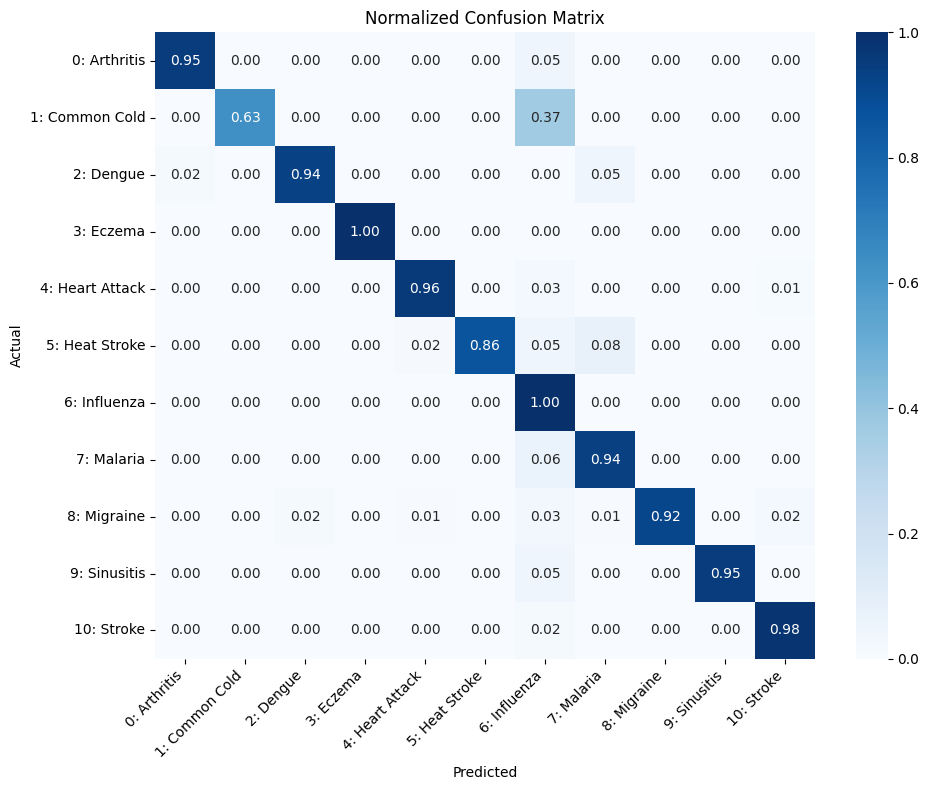

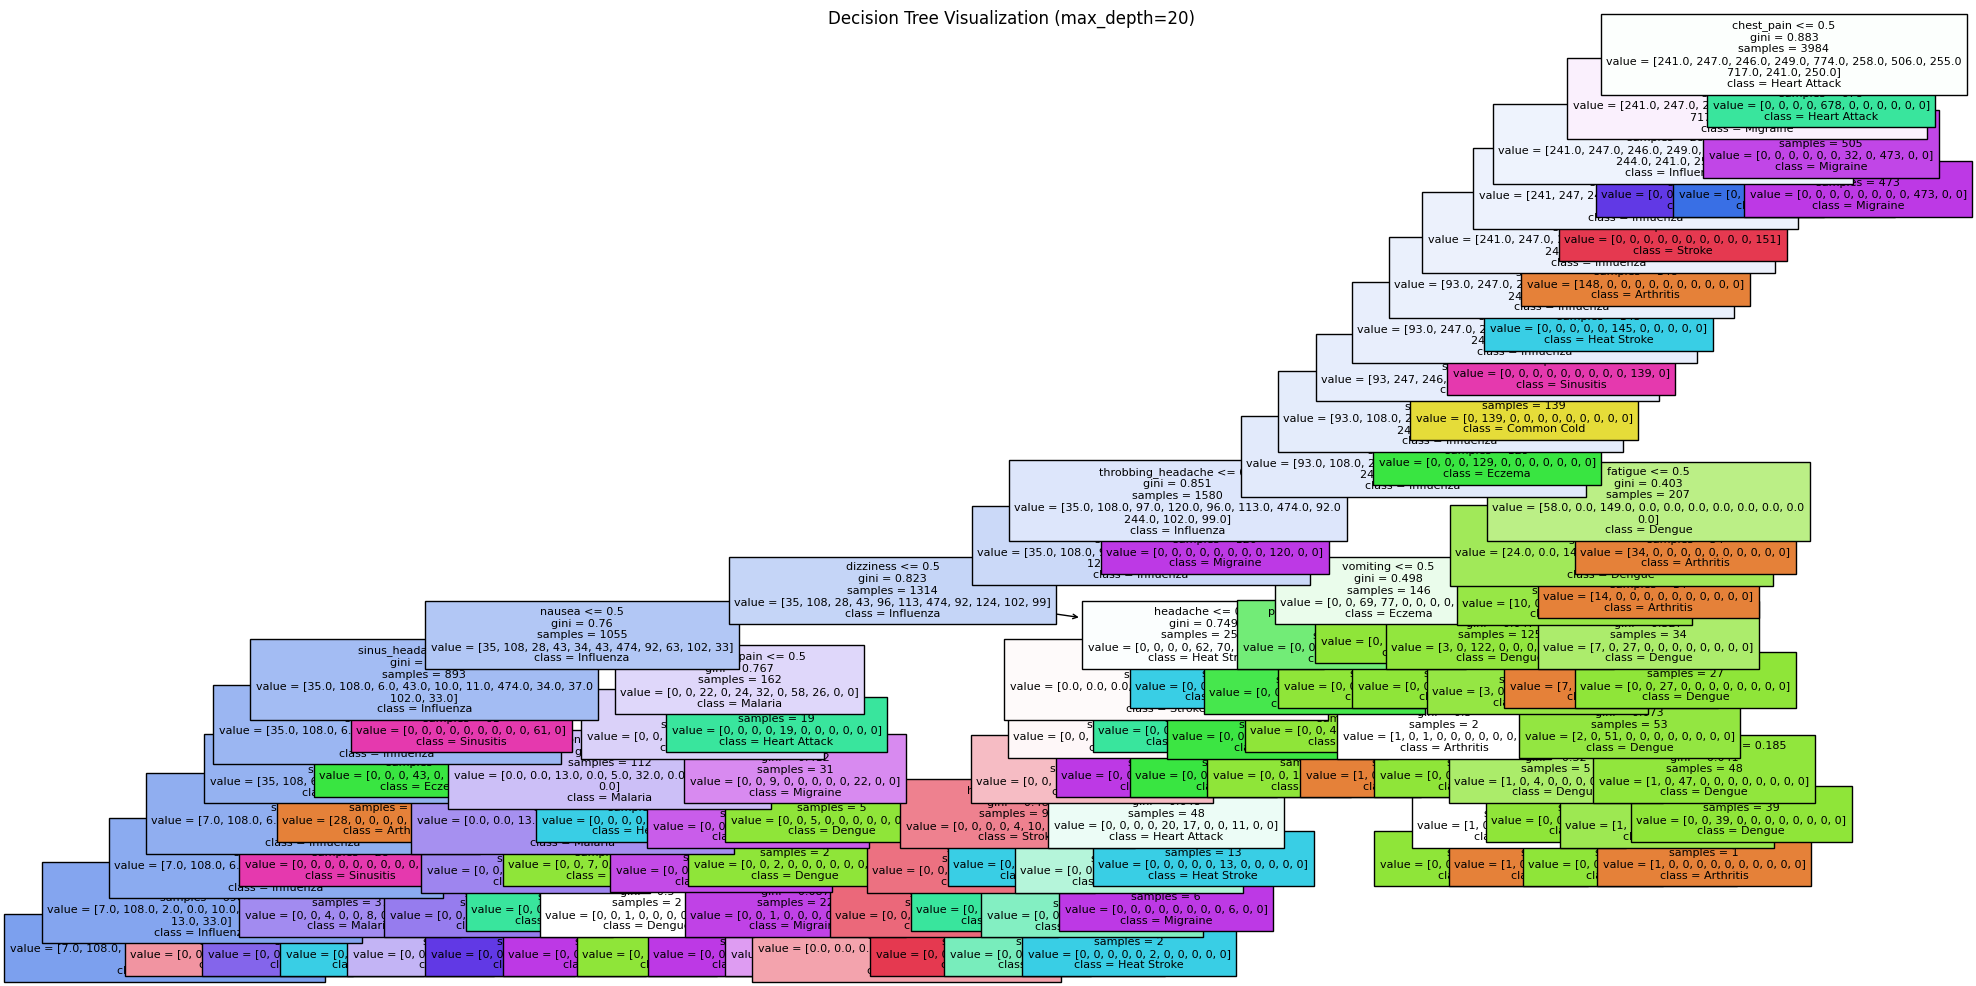

In [ ]:
# Retrain Decision Tree with limited depth
max_depths = [4,8,12,16,20]

for max_depth in max_depths:
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(X_train, y_train)
    
    # Predict on test set
    dt_pred = dt_model.predict(X_test)
    
    # Evaluate the model
    save_path = f"../report/decision_tree/confusion_matrix_maxdepth{max_depth}.png"
    evaluate_model(y_test, dt_pred, class_names, save_path)
    
    # Visualize the tree
    plt.figure(figsize=(20, 10))
    plot_tree(dt_model, 
              feature_names=df.drop(columns=["prognosis"]).columns.tolist(),
              class_names=class_names, 
              filled=True, 
              fontsize=8)
    
    plt.title(f"Decision Tree Visualization (max_depth={max_depth})")
    plt.tight_layout()
    plt.savefig(f"../report/decision_tree/decision_tree_plot_maxdepth{max_depth}.png", dpi=300)
    plt.show()


## Step 4.5: Effect of Maximum Tree Depth on Model Performance

To better understand how the depth of the Decision Tree affects its predictive power, we conduct an experiment by training trees with different `max_depth` values.

This allows us to observe the trade-off between:

- **Model Complexity**: Deeper trees can model more complex patterns but are prone to overfitting.
- **Interpretability**: Shallower trees are easier to understand but may underfit the data.
- **Accuracy**: How predictive performance varies as we change the depth.

We evaluate accuracy on the test set for several values of `max_depth` and visualize the results.


max_depth = 2: accuracy = 0.4012
max_depth = 3: accuracy = 0.4493
max_depth = 4: accuracy = 0.4885
max_depth = 5: accuracy = 0.5316
max_depth = 6: accuracy = 0.5647
max_depth = 8: accuracy = 0.6389
max_depth = 10: accuracy = 0.7051
max_depth = 12: accuracy = 0.7553
max_depth = 15: accuracy = 0.8415
max_depth = None: accuracy = 0.9719


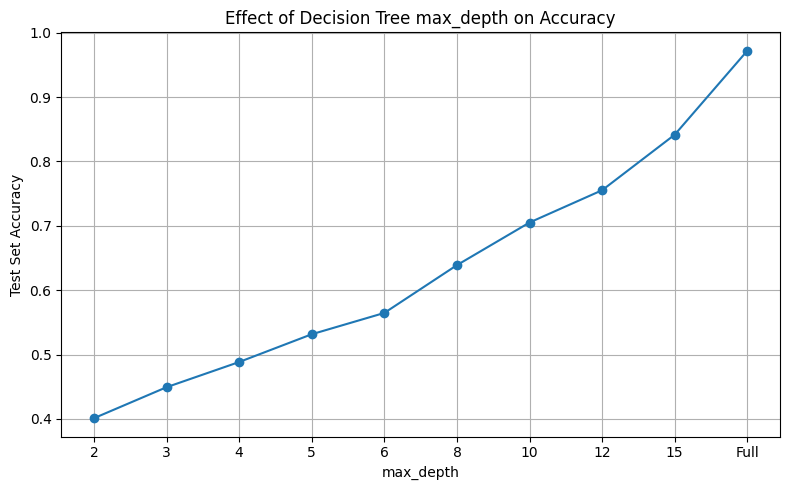

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Range of max_depth values to test
depth_values = [2, 3, 4, 5, 6, 8, 10, 12, 15, None]  # None = full depth

# Store results
depth_list = []
accuracy_list = []

for depth in depth_values:
    # Train Decision Tree
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred_depth = model.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred_depth)
    
    # Store results
    depth_list.append("Full" if depth is None else depth)
    accuracy_list.append(acc)
    
    print(f"max_depth = {depth}: accuracy = {acc:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(depth_list, accuracy_list, marker='o', linestyle='-')
plt.title("Effect of Decision Tree max_depth on Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Test Set Accuracy")
plt.grid(True)
plt.tight_layout()

# Save to report
plt.savefig("../report/decision_tree/max_depth_optimization.png", dpi=300)
plt.show()


## Conclusion of Decision Tree Modeling

In this section, we trained a Decision Tree classifier to predict diseases based on patient symptoms and environmental factors.

- The full tree (no depth limit) achieved very high accuracy (**97.19%**) but produced a very large and complex tree, prone to overfitting.
- We systematically evaluated different values of `max_depth`, observing the trade-off between model complexity and performance:

| max_depth | Accuracy (%) |
|-----------|--------------|
| 2         | 40.12        |
| 3         | 44.93        |
| 4         | 48.85        |
| 5         | 53.16        |
| 6         | 56.47        |
| 8         | 63.89        |
| 10        | 70.51        |
| 12        | 75.53        |
| 15        | 84.15        |
| Full      | 97.19        |

- As expected, shallow trees (e.g., `max_depth=2` to `4`) offered high interpretability but suffered from low accuracy (underfitting).
- Deeper trees progressively improved accuracy, but at the cost of producing much larger and less interpretable models.

From the visualization at `max_depth=4`, we observed that:

- `chest_pain` and `hiv_aids` were highly informative and appeared at the top of the tree.
- Features such as `diarrhea`, `headache`, and `trouble_seeing` also contributed to differentiating certain diseases.

This experiment clearly illustrates the **performance vs. interpretability trade-off** inherent to Decision Trees.

Overall, Decision Trees provide a transparent and useful baseline model for our medical prediction task, especially when explainability is required.

In the next step, we will explore ensemble classifiers (Random Forest, Gradient Boosted Trees) to aim for **higher predictive power** while analyzing feature importance.


## Step 5.1: Increasing Predictive Power Using Ensemble Classifiers

We've now built individual decision trees to predict diseases based on environmental factors. While the decision trees can intuitive and easy to interpret, by varying the depth we often suffer from either poor interpretability or poor accuracy, leading to poor generalization on unseen data. This is where ensemble methods like Random Forest and XGBoost come into play, significantly boosting predictive power by combining multiple decision trees.

Instead of one deep, overfit tree, Random Forest builds many (e.g., hundreds) independent decision trees. Each of these trees is intentionally "overfit" to a subset of the data (bootstrap samples) and only considers a random subset of features at each split. By averaging or majority-voting the predictions of these many diverse, slightly biased trees, the collective decision becomes far more robust and generalized. The individual errors and idiosyncrasies of each tree cancel out, leading to a significant reduction in variance and, consequently, preventing the severe overfitting we observed with the single full tree.

While also using many trees, Gradient Boosting tackles overfitting differently. It builds trees sequentially, with each new tree trying to correct the prediction errors (residuals) of the previous trees. This iterative refinement allows the model to progressively learn more complex patterns and focus on the data points that were difficult for earlier trees. Despite building on potentially "weak learners," the cumulative effect, combined with built-in regularization techniques (which XGBoost is particularly good at), leads to extremely strong and well-generalized models, mitigating the risk of overfitting found in a single deep tree. 

## Step 5.2: Utilizing Random Forest 

Now we can utilize the X and Y training sets that we defined earlier to train a Random Forest Classifier in order to potentially solve our problem with overfitting.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

And then we can create some predictions in order to evaluate the performance of the random forest.

In [ ]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

## Step 5.2: Evaluating Random Forest

We can use accuracy, a conversion matrix, Precision, recall, F1-score, and ROC-AUC to evaluate the performance of our random forest.

In [ ]:
# 1. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 3. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# 4. ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", decision_function_shape="ovr", random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:

# Predict on test set
y_pred = svm_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9840


In [ ]:
y_pred = svm_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)